In [1]:
# mnist 분류
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10])

In [5]:
w = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))

In [6]:
hf = tf.nn.softmax(tf.matmul(x,w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
ls = 0.1
train = tf.train.GradientDescentOptimizer(ls).minimize(cost)

In [7]:
isCorrect = tf.equal(tf.argmax(hf,1), tf.argmax(y,1))

In [8]:
accuracy = tf.reduce_mean(tf.cast(isCorrect, tf.float32))

In [9]:
# 몇번 실행
numEpochs = 15
batchSize = 100 # 100개씩 읽어서 train하겠다

mnist.train.num_examples # train 이미지 개수
numIter = mnist.train.num_examples / batchSize # numIter만큼하면 1 epoch가 끝난거
numIter = int(numIter)

Epoch:0001, cost: 2.826303
Epoch:0002, cost: 1.061669
Epoch:0003, cost: 0.838061
Epoch:0004, cost: 0.733233
Epoch:0005, cost: 0.669280
Epoch:0006, cost: 0.624612
Epoch:0007, cost: 0.591160
Epoch:0008, cost: 0.563869
Epoch:0009, cost: 0.541745
Epoch:0010, cost: 0.522674
Epoch:0011, cost: 0.506782
Epoch:0012, cost: 0.492448
Epoch:0013, cost: 0.479956
Epoch:0014, cost: 0.468894
Epoch:0015, cost: 0.458703
정확도:  0.8951
lable:  [9]
predict:  [9]


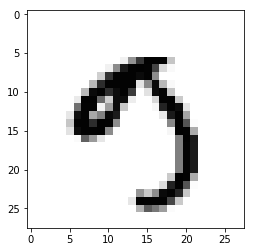

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(numEpochs): # 15epoch만큼
        avgCv = 0
        for i in range(numIter): #
            batchX,batchY = mnist.train.next_batch(batchSize) # ()안에 몇개씩 읽어올지(batchSize) 정해줄 수 있다
            _,cv = sess.run([train, cost], feed_dict={x:batchX, y:batchY})
            avgCv += cv/numIter
        print("Epoch:{:04d}, cost:{:9f}".format(epoch+1,avgCv))
#         print(epoch+1, cv, avgCv)
    print("정확도: ",accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels})) # test데이터로 확인
    # mnist의 test데이터의 x는 mnist.test.image
    # mnist의 test데이터의 y는 mnist.test.label
    r = random.randint(0, mnist.test.num_examples-1)
    print("lable: ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1))) # r번째 이미지에 대한
    print("predict: ",sess.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys')
    plt.show()

# keras에서 학습 모델 저장/ 불러오기

### 다층 퍼셉트론 모델

In [11]:
# 훈련, 검증, 시험 데이터로 나눔

In [12]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [13]:
# 데이터 읽어오기
(xTrain, yTrain),(xTest,yTest) = mnist.load_data()

In [14]:
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)
xTrain = xTrain.reshape(-1,784).astype('float32')/255.0
xTest = xTest.reshape(-1,784).astype('float32')/255.0
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 784) (60000,) (10000, 784) (10000,)


In [15]:
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [16]:
num = int(xTrain.shape[0]*0.7)

xVal = xTrain[num:]
xTrain = xTrain[:num]
yVal = yTrain[num:]
yTrain = yTrain[:num]

In [17]:
# 모델 구성
model = Sequential()
model.add(Dense(units=64,input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
# 학슴환경 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [19]:
model.fit(xTrain,yTrain, epochs=15, batch_size=50, validation_data=(xVal,yVal))





Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 1s 28us/step - loss: 1.0003 - accuracy: 0.7444 - val_loss: 0.5205 - val_accuracy: 0.8702
Epoch 2/15
42000/42000 [==============================] - 1s 29us/step - loss: 0.4540 - accuracy: 0.8806 - val_loss: 0.3925 - val_accuracy: 0.8926
Epoch 3/15
42000/42000 [==============================] - 1s 30us/step - loss: 0.3753 - accuracy: 0.8965 - val_loss: 0.3477 - val_accuracy: 0.9027
Epoch 4/15
42000/42000 [==============================] - 1s 27us/step - loss: 0.3393 - accuracy: 0.9045 - val_loss: 0.3233 - val_accuracy: 0.9099
Epoch 5/15
42000/42000 [==============================] - 1s 30us/step - loss: 0.3167 - accuracy: 0.9106 - val_loss: 0.3074 - val_accuracy: 0.9123
Epoch 6/15
42000/42000 [==============================] - 1s 27us/step - loss: 0.2993 - accuracy: 0.9149 - val_loss: 0.2925 - val_accuracy: 0.9176
Epoch 7/15
42000/42000 [==============================] - 1s 28us

In [20]:
# 모델 평가하기
metrics = model.evaluate(xTest,yTest,batch_size=50)
print("평가결과:"+str(metrics))

10000/10000 [==============================] - 0s 12us/step
평가결과:[0.21545489287702366, 0.9391000270843506]


In [21]:
idx = np.random.choice(xTest.shape[0],5)
xHat = xTest[idx]
yHat = model.predict_classes(xHat) # 결과값을 classes로 

In [22]:
for i in range(5):
    print("예측값: {} 실제값: {}".format(yHat[i], np.argmax(yTest[idx[i]])))

예측값: 8 실제값: 8
예측값: 3 실제값: 3
예측값: 6 실제값: 6
예측값: 4 실제값: 4
예측값: 8 실제값: 8


```
모델 : 모델 아키텍쳐와 모델 가중치로 구성
모델 아키텍처 : 모델이 어떤 층으로 구성
모델 가중치 : weight, bias

save() : keras모델 저장 함수(아키텍쳐+가중치)
파일 형식 : "h5"로 저장
```

In [23]:
model.save("mnist.h5")
# 폴더에 mnist.h5 파일이 생성됨

In [41]:
# data 불러오기
(xTrain, yTrain),(xTest,yTest) = mnist.load_data()
xTest = xTest.reshape(-1,784).astype('float32')/255.0
yTest = np_utils.to_categorical(yTest)
idx = np.random.choice(xTest.shape[0],10)
xhat=xTest[idx]

# 모델 불러오기
from keras.models import load_model
model = load_model('mnist.h5')
yhat = model.predict_classes(xhat)

for i in range(10):
    print("예측값: {} 실제값: {}".format(yhat[i], np.argmax(yTest[idx[i]])))

예측값: 0 실제값: 0
예측값: 2 실제값: 2
예측값: 7 실제값: 7
예측값: 0 실제값: 0
예측값: 8 실제값: 8
예측값: 2 실제값: 2
예측값: 7 실제값: 5
예측값: 9 실제값: 9
예측값: 7 실제값: 7
예측값: 7 실제값: 7


In [24]:
# 아키텍처 시각화
from keras.utils.vis_utils import model_to_dot

# 
from IPython.display import SVG

In [25]:
SVG(model_to_dot(model, show_shapes=True),
   create(prog='dot', format='svg'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Param # : weight, bias 뜻함

650 =  64*10 + 10

50240 = 784*64 + 64

In [42]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [45]:
xy.shape[0]

8

In [60]:
xdata = xy[:,:-1]
ydata = xy[:,[-1]]

xdata.shape, ydata.shape

((8, 4), (8, 1))

In [61]:
x = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,1])

w = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

In [62]:
hf = tf.matmul(x,w) +b

cost = tf.reduce_mean(tf.square(hf-y)) # regression

train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [63]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(1,101):
        _,cv,hv =  sess.run([train, cost, hf], feed_dict={x:xdata, y:ydata})
        print(step)
        print('cv : ',cv)
        print('hv : ',hv)

1
cv :  1935953600000.0
hv :  [[ -980922.8]
 [-1974649.6]
 [-1553396. ]
 [-1088935.8]
 [-1283362. ]
 [-1294164.4]
 [-1186149.9]
 [-1510190. ]]
2
cv :  2.1269942e+27
hv :  [[3.2532278e+13]
 [6.5490806e+13]
 [5.1519257e+13]
 [3.6114723e+13]
 [4.2563134e+13]
 [4.2921378e+13]
 [3.9338931e+13]
 [5.0086277e+13]]
3
cv :  inf
hv :  [[-1.0783263e+21]
 [-2.1707815e+21]
 [-1.7076755e+21]
 [-1.1970714e+21]
 [-1.4108127e+21]
 [-1.4226871e+21]
 [-1.3039420e+21]
 [-1.6601774e+21]]
4
cv :  inf
hv :  [[3.5742584e+28]
 [7.1953489e+28]
 [5.6603215e+28]
 [3.9678551e+28]
 [4.6763295e+28]
 [4.7156891e+28]
 [4.3220916e+28]
 [5.5028820e+28]]
5
cv :  inf
hv :  [[-1.1847360e+36]
 [-2.3849951e+36]
 [-1.8761896e+36]
 [-1.3151990e+36]
 [-1.5500323e+36]
 [-1.5630785e+36]
 [-1.4326155e+36]
 [-1.8240044e+36]]
6
cv :  inf
hv :  [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
7
cv :  nan
hv :  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
8
cv :  nan
hv :  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 

nan나오는 건 data가 scale이 되어있지 않아서

In [75]:
def myMinMax(data):
#     print(np.min(data)) # 전체에서 최소값
#     print(np.min(data, axis=1)) # 행 단위 최소값
#     print(np.min(data, axis=0)) # 열 단위 최소값
    bm = np.max(data,axis=0) - np.min(data, axis=0)
    bj = data - np.min(data, axis=0)
    return bj/bm
#     return data


xy = myMinMax(xy)

In [76]:
xdata = xy[:,:-1]
ydata = xy[:,[-1]]

In [82]:
x = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,1])

w = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

hf = tf.matmul(x,w) +b

cost = tf.reduce_mean(tf.square(hf-y)) # regression

train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(1,101):
        _,cv,hv, bv, wv =  sess.run([train, cost, hf, b, w], feed_dict={x:xdata, y:ydata})
        print(step)
        print('cv : ',cv)
        print('hv : ',hv)

1
cv :  6.5742273
hv :  [[3.4595268]
 [4.855599 ]
 [3.621671 ]
 [2.2294385]
 [2.9622133]
 [2.770822 ]
 [1.7863977]
 [2.0593371]]
2
cv :  6.573741
hv :  [[3.459401 ]
 [4.8554735]
 [3.6215665]
 [2.2293582]
 [2.9621181]
 [2.77073  ]
 [1.786335 ]
 [2.0592742]]
3
cv :  6.5732546
hv :  [[3.4592755]
 [4.8553476]
 [3.6214623]
 [2.229278 ]
 [2.9620233]
 [2.770638 ]
 [1.7862723]
 [2.0592115]]
4
cv :  6.5727677
hv :  [[3.4591496]
 [4.855222 ]
 [3.6213582]
 [2.2291977]
 [2.9619277]
 [2.770546 ]
 [1.7862096]
 [2.0591486]]
5
cv :  6.572281
hv :  [[3.4590242]
 [4.8550963]
 [3.6212537]
 [2.2291176]
 [2.9618328]
 [2.770454 ]
 [1.7861469]
 [2.0590856]]
6
cv :  6.5717945
hv :  [[3.4588985]
 [4.854971 ]
 [3.6211495]
 [2.2290373]
 [2.9617376]
 [2.770362 ]
 [1.7860842]
 [2.0590227]]
7
cv :  6.571308
hv :  [[3.4587731]
 [4.8548455]
 [3.6210454]
 [2.2289572]
 [2.9616427]
 [2.7702699]
 [1.7860215]
 [2.05896  ]]
8
cv :  6.5708213
hv :  [[3.4586473]
 [4.8547196]
 [3.620941 ]
 [2.228877 ]
 [2.9615476]
 [2.7701778

 [2.0541263]]
85
cv :  6.533469
hv :  [[3.4489865]
 [4.845064 ]
 [3.612925 ]
 [2.2227082]
 [2.9542375]
 [2.7631028]
 [1.7811384]
 [2.0540636]]
86
cv :  6.5329857
hv :  [[3.4488614]
 [4.844939 ]
 [3.612821 ]
 [2.222628 ]
 [2.9541426]
 [2.763011 ]
 [1.781076 ]
 [2.0540009]]
87
cv :  6.532502
hv :  [[3.448736 ]
 [4.844814 ]
 [3.6127172]
 [2.222548 ]
 [2.9540477]
 [2.7629194]
 [1.7810133]
 [2.0539384]]
88
cv :  6.5320187
hv :  [[3.4486108]
 [4.844689 ]
 [3.6126134]
 [2.2224681]
 [2.9539528]
 [2.7628276]
 [1.7809508]
 [2.0538757]]
89
cv :  6.531535
hv :  [[3.4484854]
 [4.8445635]
 [3.6125095]
 [2.222388 ]
 [2.9538581]
 [2.7627358]
 [1.7808883]
 [2.053813 ]]
90
cv :  6.5310516
hv :  [[3.44836  ]
 [4.8444386]
 [3.6124055]
 [2.2223082]
 [2.9537632]
 [2.762644 ]
 [1.7808259]
 [2.0537503]]
91
cv :  6.5305686
hv :  [[3.4482348]
 [4.8443136]
 [3.6123016]
 [2.222228 ]
 [2.9536686]
 [2.7625523]
 [1.7807634]
 [2.0536878]]
92
cv :  6.5300846
hv :  [[3.4481094]
 [4.844188 ]
 [3.6121979]
 [2.222148 ]
 [

In [93]:
# 역정규화
(hv - bv[0])

array([[2.5619142],
       [3.9579942],
       [2.7261734],
       [1.3363152],
       [2.0676224],
       [1.8765337],
       [0.8950078],
       [1.1679313]], dtype=float32)

In [94]:
wv

array([[0.02701651],
       [0.47512954],
       [2.1236224 ],
       [2.0596428 ]], dtype=float32)

In [86]:
# xor문제를 tensorflow로 구현
# 단일 퍼셉트론
# 멀티 페셉트론
# 으로 구현

In [87]:
xdata = np.array([[0,0,],[0,1],[1,0],[1,1]])
ydata = np.array([[0],[1],[1],[0]])

In [95]:
xdata.shape, ydata.shape

((4, 2), (4, 1))

In [110]:
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

w = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

hf = tf.sigmoid(tf.matmul(x,w)+b)

cost = tf.reduce_mean(-y*tf.log(hf)-(1-y)*tf.log(1-hf))

train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [111]:
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(1,10001):
        _,cv,wv = sess.run([train,cost,w], feed_dict={x:xdata, y:ydata})
        if step%100==0:
            print(step, cv, wv)
            
    h, c, a = sess.run([hf, predicted, accuracy], feed_dict={x:xdata,y:ydata})
    print("Hypothesis: {}  Correct: {}  Accuracy: {}".format(h,c,a))

100 0.695536 [[ 0.16460477]
 [-0.21645173]]
200 0.6938134 [[ 0.08995546]
 [-0.11383293]]
300 0.69333905 [[ 0.04648753]
 [-0.0624128 ]]
400 0.6932027 [[ 0.02371754]
 [-0.03446359]]
500 0.6931633 [[ 0.01191433]
 [-0.01916755]]
600 0.69315195 [[ 0.00585439]
 [-0.01075006]]
700 0.6931486 [[ 0.00278296]
 [-0.00608736]]
800 0.69314766 [[ 0.00125414]
 [-0.00348449]]
900 0.69314736 [[ 0.000513  ]
 [-0.00201844]]
1000 0.6931472 [[ 0.00016811]
 [-0.00118422]]
1100 0.6931472 [[ 1.8328481e-05]
 [-7.0408976e-04]]
1200 0.6931472 [[-3.8504553e-05]
 [-4.2441898e-04]]
1300 0.6931471 [[-5.3155363e-05]
 [-2.5931268e-04]]
1400 0.6931472 [[-5.0385250e-05]
 [-1.6051054e-04]]
1500 0.6931472 [[-4.1757485e-05]
 [-1.0057804e-04]]
1600 0.6931472 [[-3.2323613e-05]
 [-6.3733409e-05]]
1700 0.6931472 [[-2.4029634e-05]
 [-4.0796032e-05]]
1800 0.6931472 [[-1.7401597e-05]
 [-2.6344893e-05]]
1900 0.6931472 [[-1.2373948e-05]
 [-1.7149388e-05]]
2000 0.6931472 [[-8.6859109e-06]
 [-1.1230645e-05]]
2100 0.6931472 [[-6.033501

In [150]:
# 멀티레이어 퍼셉트론 기반 신경망
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

# 히든 레이어
w1 = tf.Variable(tf.random_normal([2,2]))
b1 = tf.Variable(tf.random_normal([2]))
layer1 = tf.sigmoid(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([2,2]))
b2 = tf.Variable(tf.random_normal([2]))
layer2 = tf.sigmoid(tf.matmul(layer1, w2)+b2)

# 출력 레이어
w3 = tf.Variable(tf.random_normal([2,2]))
b3 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(layer2, w3)+b3)


cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        _,cv = sess.run([train,cost], feed_dict={x:xdata, y:ydata})
        if step%500==0:
            print(step, cv)
            
    h, p, a = sess.run([hf, predicted, accuracy], feed_dict={x:xdata,y:ydata})
    print("Hypothesis: {}  Correct: {}  Accuracy: {}".format(h,p,a))

0 1.1235442
500 0.69430554
1000 0.69192374
1500 0.68999267
2000 0.68635404
2500 0.67795885
3000 0.6569146
3500 0.61106646
4000 0.55418247
4500 0.495617
5000 0.34796494
5500 0.14574173
6000 0.07349511
6500 0.04673269
7000 0.033701256
7500 0.026159711
8000 0.021291621
8500 0.017908009
9000 0.01542809
9500 0.013536653
10000 0.012048841
Hypothesis: [[0.01485902 0.01466456]
 [0.99227667 0.9921706 ]
 [0.987723   0.98777306]
 [0.01317382 0.01301005]]  Correct: [[0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]]  Accuracy: 1.0


In [149]:
# wide & deep
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

# 히든 레이어
w1 = tf.Variable(tf.random_normal([2,2]))
b1 = tf.Variable(tf.random_normal([2]))
layer1 = tf.sigmoid(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([2,2]))
b2 = tf.Variable(tf.random_normal([2]))
layer2 = tf.sigmoid(tf.matmul(layer1, w2)+b2)

w3 = tf.Variable(tf.random_normal([2,2]))
b3 = tf.Variable(tf.random_normal([2]))
layer3 = tf.sigmoid(tf.matmul(layer2, w3)+b3)

w4 = tf.Variable(tf.random_normal([2,2]))
b4 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(layer3, w3)+b3)


cost = tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(1,10001):
        _,cv,wv = sess.run([train,cost,w], feed_dict={x:xdata, y:ydata})
        if step%500==0:
            print(step, cv, wv)
            
    h, p, a = sess.run([hf, predicted, accuracy], feed_dict={x:xdata,y:ydata})
    print("Hypothesis: {}  Correct: {}  Accuracy: {}".format(h,p,a))

500 nan [784  10]
1000 nan [784  10]
1500 nan [784  10]
2000 nan [784  10]
2500 nan [784  10]
3000 nan [784  10]
3500 nan [784  10]
4000 nan [784  10]
4500 nan [784  10]
5000 nan [784  10]
5500 nan [784  10]
6000 nan [784  10]
6500 nan [784  10]
7000 nan [784  10]
7500 nan [784  10]
8000 nan [784  10]
8500 nan [784  10]
9000 nan [784  10]
9500 nan [784  10]
10000 nan [784  10]
Hypothesis: [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]  Correct: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]  Accuracy: 0.5


## Tensorflow를 사용해서 MNIST 정확도 90%이상 만들기

In [145]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000,28*28).astype('float32')/255
x_test = x_test.reshape(10000,28*28).astype('float32')/255

In [146]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [147]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [163]:
x = tf.placeholder(tf.float32, shape=[None,784])
y = tf.placeholder(tf.float32, shape=[None, 10])


w1 = tf.Variable(tf.random_normal([784,128]))
b1 = tf.Variable(tf.random_normal([128]))
layer1 = tf.sigmoid(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random_normal([128, 64]))
b2 = tf.Variable(tf.random_normal([64]))
layer2 = tf.sigmoid(tf.matmul(layer1, w2)+b2)

w3 = tf.Variable(tf.random_normal([64,10]))
b3 = tf.Variable(tf.random_normal([10]))
hf = tf.nn.softmax(tf.matmul(layer2, w3)+b3)

In [164]:
# hf = tf.nn.softmax(tf.matmul(x,w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
ls = 0.1
train = tf.train.GradientDescentOptimizer(ls).minimize(cost)
isCorrect = tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(isCorrect, tf.float32))

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

numEpoch = 100
batchSize = 200
numIter = x_train.shape[0]/batchSize
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(numEpoch):
        avgCv = 0
        for i in range(numIter):
            batchX,batchY = mnist.train.next_batch(batchSize)
            sess.run

In [ ]:
numEpoch = 100
batchSize = 200
numIter = x_train.shape[0]/batchSize
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(numEpoch):
        avgCv = 0
        for i in range(numIter):
            batchX,batchY = mnist.train.next_batch(batchSize)
            sess.run
            
            
            avgCv = 0
        for i in range(numIter): #
            batchX,batchY = mnist.train.next_batch(batchSize) # ()안에 몇개씩 읽어올지(batchSize) 정해줄 수 있다
            _,cv = sess.run([train, cost], feed_dict={x:batchX, y:batchY})
            avgCv += cv/numIter
        print("Epoch:{:04d}, cost:{:9f}".format(epoch+1,avgCv))
#         print(epoch+1, cv, avgCv)
    print("정확도: ",accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels})) # test데이터로 확인
    # mnist의 test데이터의 x는 mnist.test.image
    # mnist의 test데이터의 y는 mnist.test.label
    r = random.randint(0, mnist.test.num_examples-1)
    print("lable: ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1))) # r번째 이미지에 대한
    print("predict: ",sess.run(tf.argmax(hf,1), feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys')
    plt.show()

In [139]:
data = pd.read_csv("./Datasest/pima-indians-diabetes.csv",header=None)

In [140]:
from sklearn.preprocessing import 
data

(768, 9)